In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2022-03-29 15:14:25--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2022-03-29 15:14:26--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b1398e122a7356cea67b1ef92.dl.dropboxusercontent.com/cd/0/inline/BiYJ-E57P64NFy90aTtRq_an2FQ-9C_xvt5UW5cJsQFEOVoknujm6dkim1KKHetuYJruuP3Rv61uStiMM8wzF-1cDn8C-esYiVtHo9FjhJYJn1TVMuWSUQQpaXhj0VuDM3LAEsXM4egYlgQJ5H-4HORAyfsCxl9CplRsB-VxuXkS2g/file# [following]
--2022-03-29 15:14:26--  https://uc0b1398e122a7356cea67b1ef92.dl.dropboxusercontent.com/cd/0/inline/BiYJ-E57P64NFy90aTtRq_an2FQ-9C_xvt5UW5cJsQFEOVoknujm6dkim1KKHetuYJruuP3R

In [ ]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
base_model= MobileNet(input_shape=(224,224,3), include_top= False)

for layer in base_model.layers:
  layer.trainable= False

x=Flatten()(base_model.output)
x=Dense(units=7, activation='softmax')(x)

model=Model(base_model.input,x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen= ImageDataGenerator(
    zoom_range =0.2,
    shear_range= 0.2,
    horizontal_flip= True,
    rescale= 1./255
)

train_data= train_datagen.flow_from_directory(directory='/content/train',
                                              target_size=(224,224),
                                              batch_size=32)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen= ImageDataGenerator(1/255)

val_data= val_datagen.flow_from_directory(directory='/content/train',
                                          target_size=(224,224),
                                          batch_size=32)

Found 350 images belonging to 7 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

mc=ModelCheckpoint(filepath='best_model.h5', monitor= 'val_accuracy', verbose=1, save_only_best= True, mode='auto')

call_back=[es,mc]

In [ ]:
hist= model.fit_generator(train_data,
                          steps_per_epoch=10,
                          epochs=15,
                          validation_data= val_data,
                          validation_steps=0,
                          callbacks= [es,mc]
                          )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 9.4917 - accuracy: 0.1781WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy

Epoch 1: saving model to best_model.h5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 18s 1s/step - loss: 9.4917 - accuracy: 0.1781
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 4.0201 - accuracy: 0.5629WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy

Epoch 2: saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 4.0201 - accuracy: 0.5629
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 1.9887 - accuracy: 0.7013WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy

Epoch 3: saving model to best_model.h5
10/10 [==============================] - 12s 1s/step - loss: 1.9887 - accuracy: 0.7013
Epoch 4/15
10/10 [==============================] - ETA: 0s - loss: 0.5281 - accuracy: 0.8805WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are

In [ ]:
from keras.models import load_model
model= load_model('/content/best_model.h5')

In [ ]:
h= hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
op= dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

<IPython.core.display.Javascript object>

Saved to photo.jpg


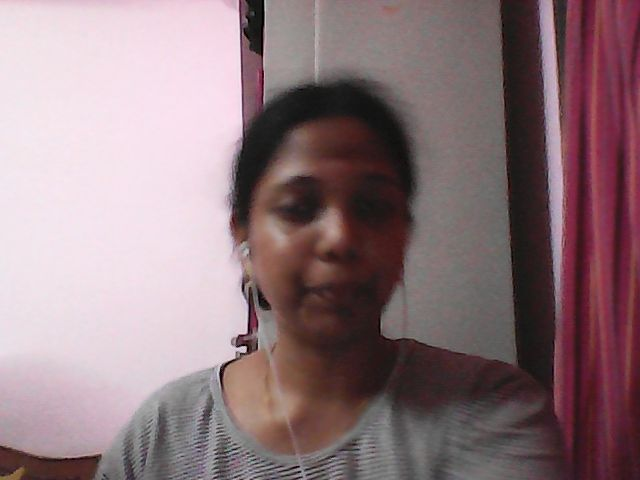

you are..  {'Sad'}


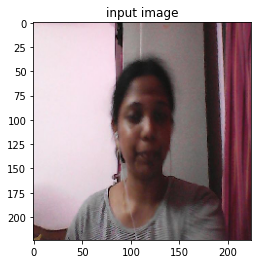

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

path='/content/photo.jpg'
img= load_img(path, target_size=(224,224))

i= img_to_array(img)/255
input_arr= np.array([i])
input_arr.shape

pred= np.argmax(model.predict(input_arr))
emotion= {op[pred]}

print(f"you are.. ", emotion)

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

<IPython.core.display.Javascript object>

Saved to photo.jpg


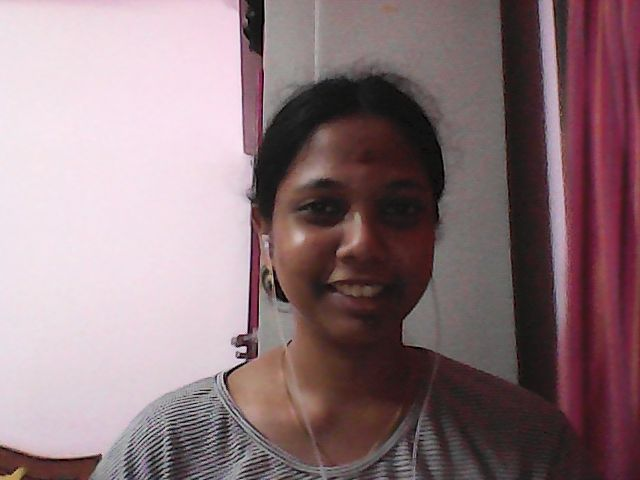

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



you are..  {'Disguist'}


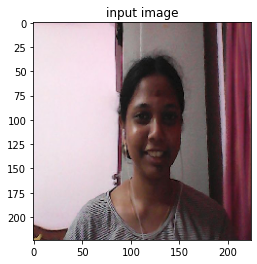

In [ ]:
path='/content/photo.jpg'
img= load_img(path, target_size=(224,224))

i= img_to_array(img)/255
input_arr= np.array([i])
input_arr.shape

pred= np.argmax(model.predict(input_arr))
emotion= {op[pred]}

print(f"you are.. ", emotion)

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
ans= "N"
while(ans!="Y"):
   print("inside loop")
   print("Type Y if you want to exit: ")
   ans= input()

inside loop
Type Y if you want to exit: 
hi
inside loop
Type Y if you want to exit: 
y
inside loop
Type Y if you want to exit: 
Y
